In [1]:
# Libraries
import pandas as pd
import numpy as np

# Wrangling
import acquire
import prepare

# Exploration/Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import explore

# Custom Modules
import util
from env import get_db_url

# Custom notebook settings for max rows and columns
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', None)

In [2]:
df = acquire.get_log_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
 7   id          847330 non-null  float64
 8   name        847330 non-null  object 
 9   slack       847330 non-null  object 
 10  start_date  847330 non-null  object 
 11  end_date    847330 non-null  object 
 12  created_at  847330 non-null  object 
 13  updated_at  847330 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  847330 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 109.9+ MB


In [4]:
df.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [5]:
util.metrics(df)

There are 900223 rows and 16 columns in this dataframe.
Plus the following nulls:
Unnamed: 0         0
date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
dtype: int64
Unnamed: 0      int64
date           object
time           object
path           object
user_id         int64
cohort_id     float64
ip             object
id            float64
name           object
slack          object
start_date     object
end_date       object
created_at     object
updated_at     object
deleted_at    float64
program_id    float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,900223.0,450111.000000,259872.140027,0.0,225055.5,450111.0,675166.5,900222.0
user_id,900223.0,458.825707,249.296767,1.0,269.0,475.0,660.0,981.0
cohort_id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
deleted_at,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program_id,847330.0,2.086004,0.388231,1.0,2.0,2.0,2.0,4.0


In [6]:
counts = util.get_numbers(df)

Unnamed: 0
0         1
600153    1
600142    1
600143    1
600144    1
         ..
300078    1
300079    1
300080    1
300081    1
900222    1
Name: Unnamed: 0, Length: 900223, dtype: int64
-----------------
date
2021-03-19    3104
2021-04-12    2446
2021-03-25    2369
2020-09-08    2304
2021-03-16    2298
2020-07-27    2275
2021-02-02    2257
2021-04-05    2236
2021-03-29    2230
2020-07-16    2196
2021-04-15    2192
2021-04-06    2184
2021-03-23    2171
2021-04-19    2156
2020-04-20    2144
2020-09-28    2133
2020-08-03    2117
2021-01-11    2046
2020-10-26    2039
2020-07-28    2031
2020-06-01    1992
2021-03-22    1977
2020-10-22    1976
2021-03-18    1975
2020-09-21    1966
2020-08-10    1944
2020-06-16    1939
2021-04-20    1930
2020-11-02    1919
2020-09-11    1917
2020-12-08    1893
2019-10-07    1879
2021-04-01    1874
2021-01-19    1874
2020-07-24    1852
2020-07-20    1848
2021-03-08    1846
2020-08-06    1843
2021-01-26    1838
2020-11-30    1835
2020-12-14    1825
2021-02-

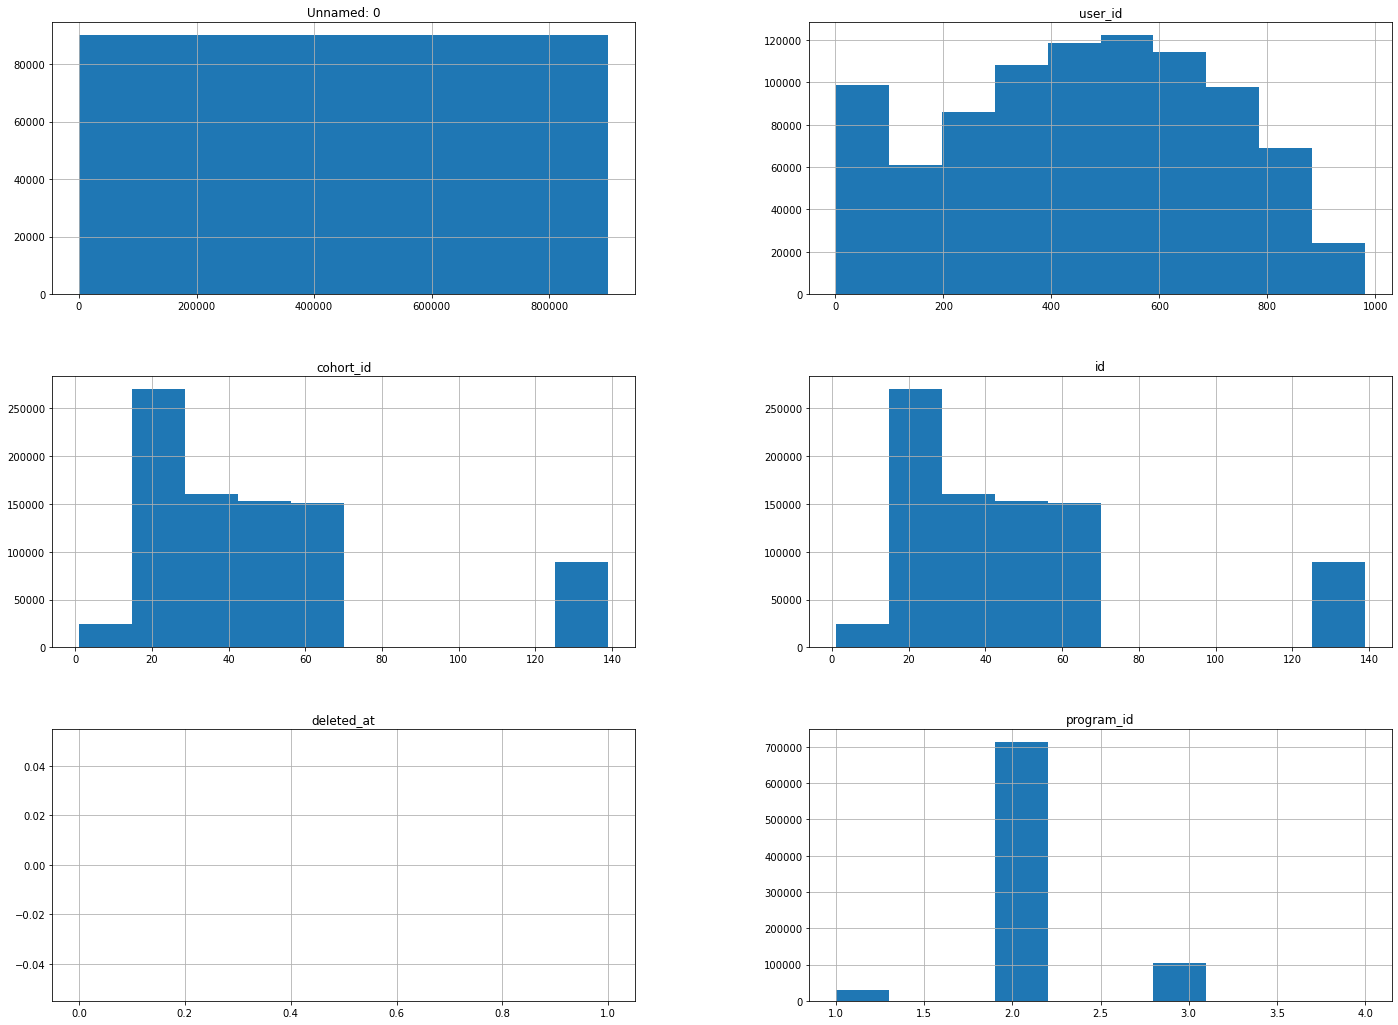

In [7]:
# Shows histograms for numerical columns in df
df.hist(figsize=(24, 18))
plt.show()

In [8]:
ds_names = ['Ada', 'Bayes', 'Curie', 'Darden', 'Easley', 'Florence', '']

In [9]:
ds_alumni = df.loc[df['name'].isin(ds_names)]

In [10]:
ds_alumni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103412 entries, 326053 to 900202
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  103412 non-null  int64  
 1   date        103412 non-null  object 
 2   time        103412 non-null  object 
 3   path        103411 non-null  object 
 4   user_id     103412 non-null  int64  
 5   cohort_id   103412 non-null  float64
 6   ip          103412 non-null  object 
 7   id          103412 non-null  float64
 8   name        103412 non-null  object 
 9   slack       103412 non-null  object 
 10  start_date  103412 non-null  object 
 11  end_date    103412 non-null  object 
 12  created_at  103412 non-null  object 
 13  updated_at  103412 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  103412 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 13.4+ MB


In [11]:
# convert date, time, start_date, end_date, created_at, and	updated_at, to datetime dtype
# convert all ids to objects since they're used as ids not computational numbers
# drop 'cohort_id' or 'id' since they're the same
# drop 'slack', since 'name' has basically the same info plus more
# drop deleted_at since it's nulls
# can set a multi-index using 'date' and 'time' as the timestamp
# figure out how to sus out the ds students from the 52893 entries with some column nulls
# at least 103412 ds cohort entries
# 1 value in path is a null

# Preparation
- 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [12]:
q2_df = prepare.prepare_logs()

In [13]:
q2_df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


In [14]:
q2_df.dtypes

path           object
user_id         int64
cohort_id     float64
ip             object
name           object
start_date     object
end_date       object
created_at     object
updated_at     object
program_id     object
date_time      object
dtype: object

In [15]:
q2_df = prepare.df_q2_eda(q2_df)

In [16]:
q2_df.head()

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


# Exploration
- 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [17]:
q2_df['cohorts'].value_counts()

ceres         40730
zion          38096
jupiter       37109
fortuna       36902
voyageurs     35636
ganymede      33844
apex          33568
deimos        32888
darden        32015
teddy         30926
hyperion      29855
betelgeuse    29356
ulysses       28534
europa        28033
xanadu        27749
bayes         26538
wrangell      25586
andromeda     25359
kalypso       23691
curie         21581
yosemite      20743
bash          17713
luna          16623
marco         16397
easley        14715
lassen         9587
arches         8890
florence       8562
sequoia        7444
neptune        7276
olympic        4954
kings          2845
pinnacles      2158
hampton        1712
oberon         1672
quincy         1237
niagara         755
mammoth         691
glacier         598
joshua          302
ike             253
badlands         93
franklin         72
apollo            5
denali            4
everglades        1
Name: cohorts, dtype: int64

Based on the question should I scale my data to try to equally represent each cohort?

If so, how do I deal with cohorts with less than 100 entries? Are they considered anomalies as well?

In [18]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('probability'),
        left_index=True,
        right_index=True,
    )

In [19]:
ip_df = value_counts_and_frequencies(q2_df.ip)
ip_df.head()

,count,probability
97.105.19.58,245055,0.321048
97.105.19.61,60530,0.079301
192.171.117.210,8911,0.011674
67.11.50.23,4181,0.005478
172.124.67.93,3511,0.004600


<AxesSubplot:>

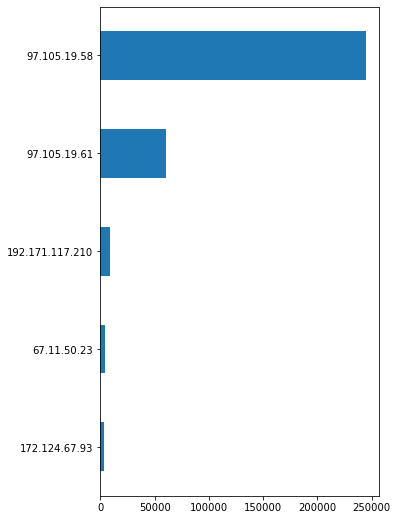

In [20]:
ip_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))

IP Address: 97.105.19.61
ASN: 11427
City: San Antonio
State/Region: Texas
Country: US
Postal Code: 78205
ISP: Codeup LLC
Time Zone: -05:00

IP Address: 97.105.19.58
ASN: 11427
City: San Antonio
State/Region: Texas
Country: US
Postal Code: 78205
ISP: Codeup LLC
Time Zone: -05:00

IP Address: 192.171.117.210
ASN: 16887
City: San Antonio
State/Region: Texas
Country: US
Postal Code: 78216
ISP: Aethernet LLC
Time Zone: -05:00

In [21]:
paths = q2_df['path'].value_counts()
paths

/                                                                                                                                                                                                                                                                                                                         39514
toc                                                                                                                                                                                                                                                                                                                       16680
javascript-i                                                                                                                                                                                                                                                                                                              16386
search/search_index.json                

In [22]:
paths_df = paths.to_frame()

In [23]:
paths_df

,path
/,39514
toc,16680
javascript-i,16386
search/search_index.json,16185
html-css,11843
java-iii,11773
java-ii,10917
spring,10480
jquery,10124
mysql,9716
